In [2]:
import pandas as pd

# Map the cell lines to developmental or injury response
cell_line_devIR_mapping = pd.read_excel('C:/research/20220131_CellLine_Registry (4).xlsx')
cell_line_devIR_mapping = cell_line_devIR_mapping.iloc[:, :2]

print(cell_line_devIR_mapping)

   CellLine      LineClass
0     BT106  Developmental
1     BT108  Developmental
2     BT126  Developmental
3     BT134  Developmental
4     BT140  Developmental
..      ...            ...
65     PFA4      Pediatric
66     PFA5      Pediatric
67     PFA7      Pediatric
68      ST1      Pediatric
69      ST4      Pediatric

[70 rows x 2 columns]


In [3]:
cell_line_registry = pd.read_excel('C:/research/43018_2020_154_MOESM3_ESM (6).xlsx')
print(cell_line_registry.head(10))

  SampleID PatientID SampleType CultureMethod                Pathology  \
0  BT127_L     BT127        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
1  BT147_L     BT147        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
2   BT48_L      BT48        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
3   BT67_L      BT67        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
4   BT73_L      BT73        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
5   BT84_L      BT84        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
6   BT89_L      BT89        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
7   BT94_L      BT94        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
8   G523_L      G523        GSC      ADHERENT  GLIOBLASTOMA (GRADE IV)   
9   G549_L      G549        GSC      ADHERENT  GLIOBLASTOMA (GRADE IV)   

       Stage Age     Sex IDH_Mutation_Status DoublingTime_Hours  \
0    PRIMARY  55    MALE                  WT              247.2   
1  RECURRENT  55    MALE                  WT       

c:\Users\xiazh\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
cell_line_registry_with_devIR = pd.merge(cell_line_registry, cell_line_devIR_mapping, left_on='PatientID', right_on='CellLine', how='inner')
print(cell_line_registry_with_devIR.head(5))

  SampleID PatientID SampleType CultureMethod                Pathology  \
0  BT147_L     BT147        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
1   BT48_L      BT48        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
2   BT67_L      BT67        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
3   BT73_L      BT73        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   
4   BT89_L      BT89        GSC   NEUROSPHERE  GLIOBLASTOMA (GRADE IV)   

       Stage Age     Sex IDH_Mutation_Status DoublingTime_Hours  \
0  RECURRENT  55    MALE                  WT              84.96   
1    PRIMARY  69    MALE                  WT              60.72   
2    PRIMARY  44    MALE                  WT             131.28   
3    PRIMARY  52    MALE                  WT              34.08   
4    PRIMARY  59  FEMALE                  WT              158.5   

  OrthotopicXenoSurvival_Days Sphere_Formation_Percent SingleCell_RNAseq  \
0                          51                      3.9               YES   


In [5]:
# SampleID dev IR mapping
sampleID_dev_IR_mapping = cell_line_registry_with_devIR[['SampleID', 'LineClass']]
print(sampleID_dev_IR_mapping.head(5))

  SampleID      LineClass
0  BT147_L  Developmental
1   BT48_L  Developmental
2   BT67_L  Developmental
3   BT73_L  Developmental
4   BT89_L  Developmental


In [6]:
print(cell_line_registry_with_devIR['LineClass'].value_counts())

stringent_filtered_df = cell_line_registry_with_devIR[(cell_line_registry_with_devIR['CultureMethod'] == 'ADHERENT') & 
                                            (cell_line_registry_with_devIR['Stage'] == 'PRIMARY') & 
                                            (cell_line_registry_with_devIR['IDH_Mutation_Status'] == 'WT') & 
                                            (cell_line_registry_with_devIR['SampleType'] == 'GSC')]
print(stringent_filtered_df['LineClass'].value_counts())

filtered_df = cell_line_registry_with_devIR[(cell_line_registry_with_devIR['Stage'] == 'PRIMARY') & 
                                            (cell_line_registry_with_devIR['IDH_Mutation_Status'] == 'WT') & 
                                            (cell_line_registry_with_devIR['SampleType'] == 'GSC')]
print(filtered_df['LineClass'].value_counts())

LineClass
Developmental     31
InjuryResponse    29
Name: count, dtype: int64
LineClass
InjuryResponse    16
Developmental      5
Name: count, dtype: int64
LineClass
Developmental     23
InjuryResponse    18
Name: count, dtype: int64


In [7]:
# Get a list of sampleIDs from filtered_df, use it to filter expression matrix
sampleIDs = filtered_df['SampleID']
print(sampleIDs)
print(len(sampleIDs))

1      BT48_L
2      BT67_L
3      BT73_L
4      BT89_L
5      BT94_L
6      G523_L
7      G549_L
8      G564_L
9      G566_L
10     G583_L
12     G637_L
13     G729_L
14     G797_L
15     G799_L
16     G800_L
17     G837_L
18     G851_L
19     G876_L
20     G885_L
21     G895_L
22    BT106_L
23    BT108_L
24    BT126_L
25    BT134_L
26    BT140_L
27    BT169_L
28    BT189_L
29    BT208_L
30    BT238_L
32    BT301_L
33    BT426_L
34    BT429_L
35     BT50_L
36     BT69_L
37     BT75_L
38     G561_L
39     G571_L
40     G613_L
44     G789_L
47     G828_L
48     G861_L
Name: SampleID, dtype: object
41


In [9]:
expression_matrix = pd.read_excel('C:/research/raw_data/RNAseq_cohorts1-5 plus extra.xlsx')

In [10]:
expression_matrix_clean = expression_matrix.iloc[1:]
expression_matrix_clean.columns = expression_matrix_clean.iloc[0] # Set first row as column names
expression_matrix_clean = expression_matrix_clean.iloc[1:]  # Remove the first row
expression_matrix_clean.set_index(expression_matrix_clean.columns[0], inplace=True)  # Set the first column as index

print(expression_matrix_clean.head(10))

1               BT41_T    BT48_T    BT50_T    BT53_T    BT67_T    BT69_T  \
nan                                                                        
DDX11L1       1.712039  1.712039  1.682834  1.712039  1.682834  1.682834   
WASH7P        8.975101  7.849454  8.035795  8.181404  7.758735  9.755352   
LOC729737     7.258292  6.069857  8.348614  4.950745  6.056402   7.62392   
FAM138D       1.700741  1.700741  1.716977  1.700741  1.716977  1.716977   
LOC101928626  1.694298  1.694298  1.696543  1.694298  1.696543  1.696543   
MIR6723       1.702649  1.702649  1.706007   2.49926  1.706007  1.706007   
LOC100133331  6.801026  4.463972  6.774509  7.213878   7.46221   6.56554   
LOC100288069  3.912371  3.588884  5.587735  5.020531  5.560431  4.995782   
FAM87B        4.436688   5.22912  5.979105  6.701131  5.119113  5.509685   
LINC00115      5.82109  7.179551  6.037731  7.019767  5.990491  4.397862   

1               BT73_T    BT75_T    BT84_T    BT89_T  ...    AB2_NT    PB1_NT  \
nan   

In [11]:
expression_matrix_clean = expression_matrix_clean[sampleIDs]
print(expression_matrix_clean.head())
print(expression_matrix_clean.shape)

1               BT48_L    BT67_L    BT73_L    BT89_L    BT94_L    G523_L  \
nan                                                                        
DDX11L1       2.777221  1.697442  1.719338  2.681513  1.697442  2.684551   
WASH7P        8.050898  7.963597  8.319725   8.36134  7.768512  8.397148   
LOC729737     4.056114  2.156779     2.716  3.567389  3.240305  2.339967   
FAM138D       1.712674  1.731367  1.712674  1.731367  1.731367  1.731367   
LOC101928626  1.723233  1.751513  1.723233  1.751513  1.751513  1.751513   

1               G549_L    G564_L    G566_L    G583_L  ...   BT429_L    BT50_L  \
nan                                                   ...                       
DDX11L1       1.697442  1.697442  1.697442  1.697442  ...  1.719338  1.697442   
WASH7P        8.195249  7.313845  8.056219  7.659373  ...  8.382997  7.448546   
LOC729737     3.176777  2.956747  3.797197  4.095726  ...   4.87945  2.483791   
FAM138D       1.731367  1.731367  1.731367  1.731367  ...  1.7

In [12]:
gene_filtered = expression_matrix_clean.loc[["IDO1"]]
gene_filtered_long = gene_filtered.melt(var_name="Cell_Type", value_name="Expression_Value")

gene_filtered_long.head()

,Cell_Type,Expression_Value
0,BT48_L,2.035202
1,BT67_L,1.475973
2,BT73_L,2.035202
3,BT89_L,1.475973
4,BT94_L,1.475973


In [13]:
gene_filtered_long_with_class = pd.merge(gene_filtered_long, sampleID_dev_IR_mapping, left_on='Cell_Type', right_on='SampleID', how='inner')
gene_filtered_long_with_class.drop(columns=['SampleID'], inplace=True)

print(gene_filtered_long_with_class.shape)
gene_filtered_long_with_class.head()

(41, 3)


,Cell_Type,Expression_Value,LineClass
0,BT48_L,2.035202,Developmental
1,BT67_L,1.475973,Developmental
2,BT73_L,2.035202,Developmental
3,BT89_L,1.475973,Developmental
4,BT94_L,1.475973,Developmental


In [14]:
developmental_expression_values = gene_filtered_long_with_class[gene_filtered_long_with_class['LineClass'] == 'Developmental']['Expression_Value'].tolist()
print(developmental_expression_values)
injury_response_expression_values = gene_filtered_long_with_class[gene_filtered_long_with_class['LineClass'] == 'InjuryResponse']['Expression_Value'].tolist()
print(injury_response_expression_values)

[2.03520200404074, 1.47597278357724, 2.03520200404074, 1.47597278357724, 1.47597278357724, 1.47597278357724, 7.50554516657806, 1.78046918629081, 2.97215043940988, 3.02214428235456, 2.03520200404074, 2.03520200404074, 2.03520200404074, 2.03520200404074, 4.98491809231366, 1.47597278357724, 1.47597278357724, 1.78046918629081, 2.03520200404074, 1.47597278357724, 1.47597278357724, 2.03520200404074, 1.78046918629081]
[3.42422298251426, 3.21064604719351, 6.96290027792683, 10.8358738409854, 6.29405978780367, 5.93725877919972, 1.78046918629081, 7.58106254740559, 4.09107059512747, 5.3527592165312, 1.78046918629081, 4.78031253334292, 2.89776607219881, 7.34670497227225, 4.923768018996, 8.12900276551145, 3.56610235801754, 6.50098127992725]


In [15]:
from scipy import stats

# Welch’s t-test (does not assume equal variance)
t_stat, p_value = stats.ttest_ind(developmental_expression_values, injury_response_expression_values, equal_var=False)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -4.811
p-value: 0.0001


In [16]:
def perform_t_test(gene, expression_matrix_clean):
    
    gene_filtered = expression_matrix_clean.loc[[gene]]
    gene_filtered_long = gene_filtered.melt(var_name="Cell_Type", value_name="Expression_Value")

    gene_filtered_long_with_class = pd.merge(gene_filtered_long, sampleID_dev_IR_mapping, left_on='Cell_Type', right_on='SampleID', how='inner')
    gene_filtered_long_with_class.drop(columns=['SampleID'], inplace=True)

    developmental_expression_values = gene_filtered_long_with_class[gene_filtered_long_with_class['LineClass'] == 'Developmental']['Expression_Value'].tolist()
    injury_response_expression_values = gene_filtered_long_with_class[gene_filtered_long_with_class['LineClass'] == 'InjuryResponse']['Expression_Value'].tolist()

    t_stat, p_value = stats.ttest_ind(developmental_expression_values, injury_response_expression_values, equal_var=False)
    
    print(f"Gene: {gene}")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_value:.4f}")
    
    return 

In [17]:
perform_t_test("IDO1", expression_matrix_clean)

Gene: IDO1
t-statistic: -4.811
p-value: 0.0001


C:\Users\xiazh\AppData\Local\Temp\ipykernel_32472\382953882.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(x="LineClass", y="Expression_Value", data=gene_filtered_long_with_class, hue='LineClass', palette=custom_colors)


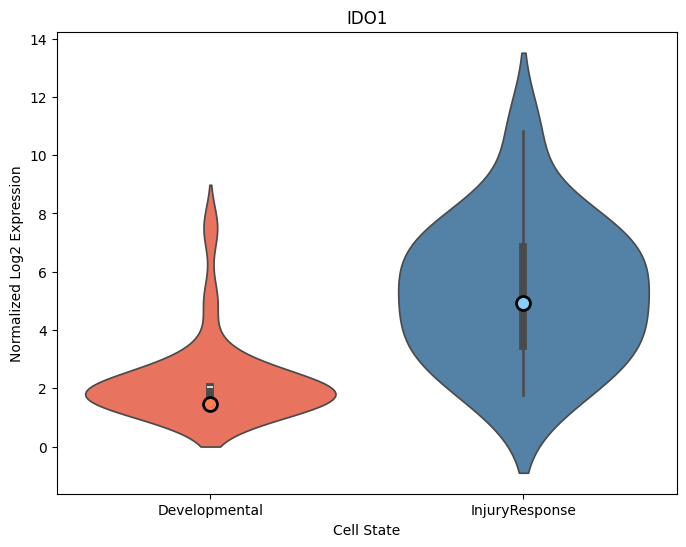

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Violin plot

# Custom color palette
custom_colors = ['#FF6347', '#4682B4', '#32CD32']  # List of hex colors

plt.figure(figsize=(8, 6))
sns.violinplot(x="LineClass", y="Expression_Value", data=gene_filtered_long_with_class, hue='LineClass', palette=custom_colors)

plt.title("IDO1")
#plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Normalized Log2 Expression")
plt.xlabel("Cell State")


# Highlight specific point (e.g., expression value of 'GSC' in 'IR' group)
G523_expression = gene_filtered_long_with_class[(gene_filtered_long_with_class['Cell_Type'] == 'G523_L')]['Expression_Value'].values[0]
G571_expression = gene_filtered_long_with_class[(gene_filtered_long_with_class['Cell_Type'] == 'G571_L')]['Expression_Value'].values[0]


# Plot the specific point (e.g., as a red dot)
plt.scatter(x=0, y=G523_expression, color='#FF7F50', s=100, label='Highlighted Point', zorder=5, edgecolor='black', linewidth=2)
plt.scatter(x=1, y=G571_expression, color='#87CEFA', s=100, label='Highlighted Point', zorder=5, edgecolor='black', linewidth=2)

folder_path = "C:/research/figures/gene_expression_violin_plots"
file_name = "IDO1" + ".png"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the plot
plt.savefig(os.path.join(folder_path, file_name))


# plt.show()
#print(highlight_point)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

gene = "IDO1"

def make_violin_plot(gene, expression_matrix_clean):
    gene_filtered = expression_matrix_clean.loc[[gene]]
    gene_filtered_long = gene_filtered.melt(var_name="Cell_Type", value_name="Expression_Value")

    gene_filtered_long_with_class = pd.merge(gene_filtered_long, sampleID_dev_IR_mapping, left_on='Cell_Type', right_on='SampleID', how='inner')
    gene_filtered_long_with_class.drop(columns=['SampleID'], inplace=True)

    # Custom color palette
    custom_colors = ['#FF6347', '#4682B4']  # List of hex colors

    plt.figure(figsize=(2, 6))
    sns.violinplot(x="LineClass", y="Expression_Value", data=gene_filtered_long_with_class, hue='LineClass', palette=custom_colors)

    plt.title(gene)
    #plt.xticks(rotation=45, fontsize=12)
    plt.ylabel("Normalized Log2 Expression")
    plt.xlabel("Cell State")


    # Highlight specific point (e.g., expression value of 'GSC' in 'IR' group)
    G523_expression = gene_filtered_long_with_class[(gene_filtered_long_with_class['Cell_Type'] == 'G523_L')]['Expression_Value'].values[0]
    G571_expression = gene_filtered_long_with_class[(gene_filtered_long_with_class['Cell_Type'] == 'G571_L')]['Expression_Value'].values[0]


    # Plot the specific point (e.g., as a red dot)
    # plt.scatter(x=0, y=G523_expression, color='#FF7F50', s=100, label='Highlighted Point', zorder=5, edgecolor='black', linewidth=2)
    # plt.scatter(x=1, y=G571_expression, color='#87CEFA', s=100, label='Highlighted Point', zorder=5, edgecolor='black', linewidth=2)

    folder_path = "C:/research/figures/gene_expression_violin_plots"
    file_name = gene + ".png"

    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save the plot
    plt.savefig(os.path.join(folder_path, file_name))

    #plt.show()
    



Below is the finalized version of code for plotting

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

gene = "IDO1"

def make_violin_plot(gene, expression_matrix_clean):
    gene_filtered = expression_matrix_clean.loc[[gene]]
    gene_filtered_long = gene_filtered.melt(var_name="Cell_Type", value_name="Expression_Value")

    gene_filtered_long_with_class = pd.merge(gene_filtered_long, sampleID_dev_IR_mapping, left_on='Cell_Type', right_on='SampleID', how='inner')
    gene_filtered_long_with_class.drop(columns=['SampleID'], inplace=True)

    # Custom color palette
    custom_colors = ['#FF6347', '#4682B4']  # List of hex colors

    plt.figure(figsize=(2, 6))
    # sns.violinplot(x="LineClass", y="Expression_Value", data=gene_filtered_long_with_class, hue='LineClass', palette=custom_colors)
    ax = sns.violinplot(x="LineClass", y="Expression_Value", data=gene_filtered_long_with_class, hue='LineClass', palette=custom_colors)


    plt.title(gene)
    #plt.xticks(rotation=45, fontsize=12)
    plt.ylabel("Normalized Log2 Expression")
    plt.xlabel("Cell State")

    # Rename the x-axis labels manually
    new_labels = ['Dev', 'IR']  # Custom labels for your x-ticks
    ax.set_xticklabels(new_labels)

    # Manually adding significance line (for all comparisons)
    # Here we manually add the significance line between 'Dev' and 'IR' groups
    ax.plot([0, 1], [max(gene_filtered_long_with_class['Expression_Value']) + 0.5] * 2, color='black', lw=1.5)  # Draw the line between groups
    # ax.text(0.5, max(gene_filtered_long_with_class['Expression_Value']) + 0.6, "p < 0.05", ha='center', va='bottom', fontsize=12, color='black')  # Text annotation

    # Highlight specific point (e.g., expression value of 'GSC' in 'IR' group)
    G523_expression = gene_filtered_long_with_class[(gene_filtered_long_with_class['Cell_Type'] == 'G523_L')]['Expression_Value'].values[0]
    G571_expression = gene_filtered_long_with_class[(gene_filtered_long_with_class['Cell_Type'] == 'G571_L')]['Expression_Value'].values[0]


    # Plot the specific point (e.g., as a red dot)
    # plt.scatter(x=0, y=G523_expression, color='#FF7F50', s=100, label='Highlighted Point', zorder=5, edgecolor='black', linewidth=2)
    # plt.scatter(x=1, y=G571_expression, color='#87CEFA', s=100, label='Highlighted Point', zorder=5, edgecolor='black', linewidth=2)

    folder_path = "C:/research/figures/gene_expression_violin_plots"
    file_name = gene + ".png"

    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save the plot
    plt.savefig(os.path.join(folder_path, file_name), bbox_inches='tight')

    #plt.show()
    



C:\Users\xiazh\AppData\Local\Temp\ipykernel_32472\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: IDO1
t-statistic: -4.811
p-value: 0.0001


C:\Users\xiazh\AppData\Local\Temp\ipykernel_32472\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: SLC7A5
t-statistic: -2.689
p-value: 0.0105


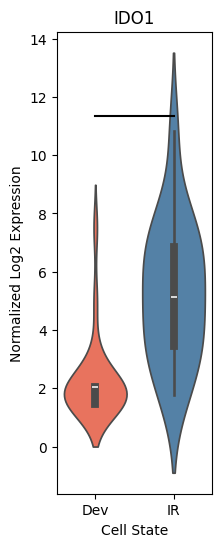

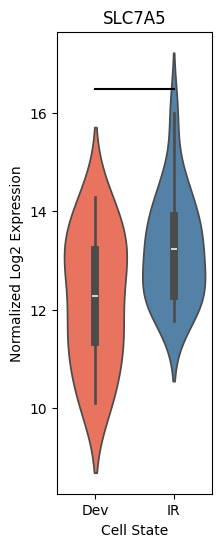

In [24]:
make_violin_plot("IDO1", expression_matrix_clean)
perform_t_test("IDO1", expression_matrix_clean)
make_violin_plot("SLC7A5", expression_matrix_clean)
perform_t_test("SLC7A5", expression_matrix_clean)

In [31]:
# Load the file into a list
with open("interest_genes.txt", "r") as file:
    gene_list = file.read().splitlines()

print(gene_list)

['IDO1', 'AQP4', 'MMP9', 'CYP1B1', 'NQO1', 'AHR', 'AHRR', 'SLC22A4', 'IL4I1', 'KMO', 'KYNU', 'HAAO']


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: IDO1
t-statistic: -4.811
p-value: 0.0001


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: AQP4
t-statistic: 3.521
p-value: 0.0011


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: MMP9
t-statistic: -0.772
p-value: 0.4452


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: CYP1B1
t-statistic: -3.982
p-value: 0.0004


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: NQO1
t-statistic: -3.295
p-value: 0.0021


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: AHR
t-statistic: -0.954
p-value: 0.3463


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: AHRR
t-statistic: 1.661
p-value: 0.1050


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: SLC22A4
t-statistic: -3.415
p-value: 0.0015


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: IL4I1
t-statistic: -3.695
p-value: 0.0010


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: KMO
t-statistic: -3.066
p-value: 0.0046


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: KYNU
t-statistic: -6.065
p-value: 0.0000


C:\Users\xiazh\AppData\Local\Temp\ipykernel_7348\3819544291.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


Gene: HAAO
t-statistic: -2.444
p-value: 0.0205


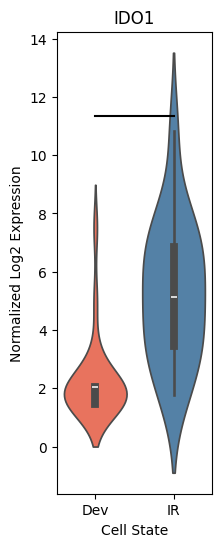

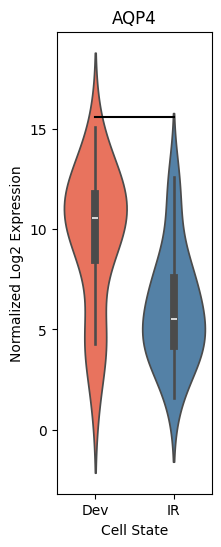

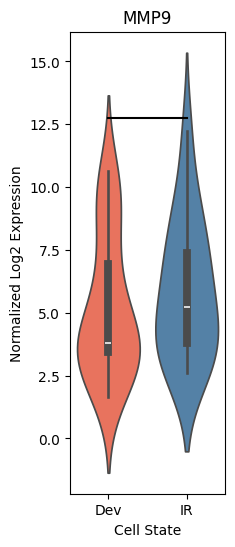

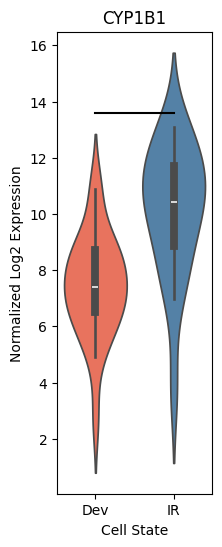

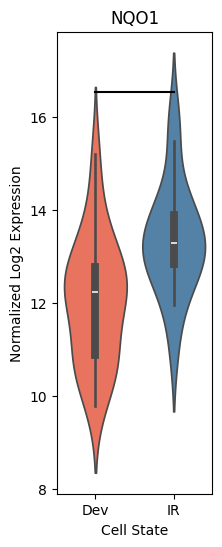

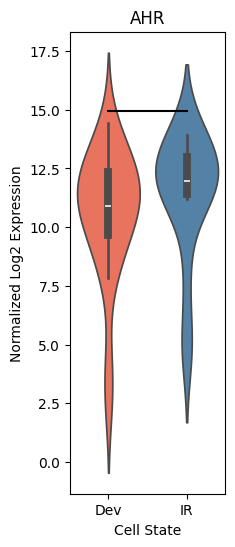

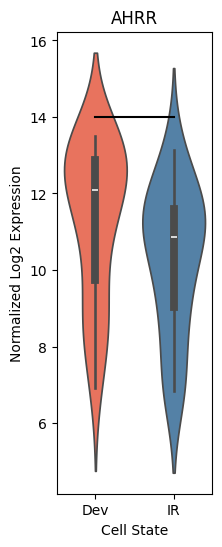

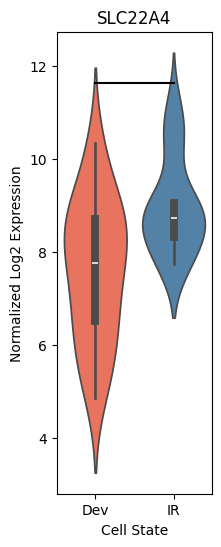

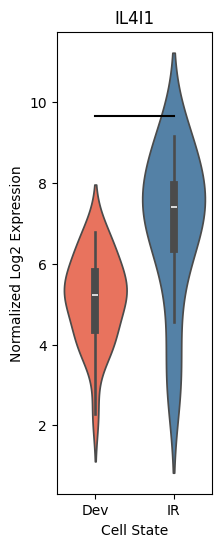

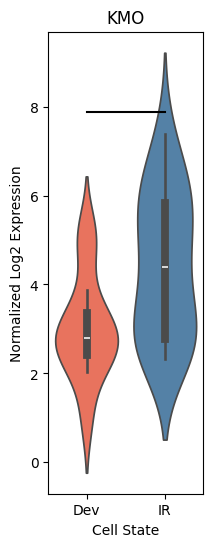

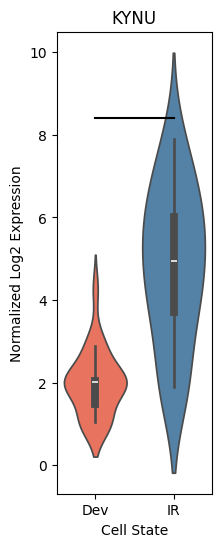

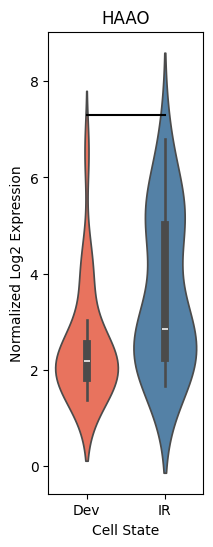

In [32]:
for gene in gene_list:
    make_violin_plot(gene, expression_matrix_clean)
    perform_t_test(gene, expression_matrix_clean)
